In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model

In [27]:
np.random.seed(0)

In [28]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [29]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

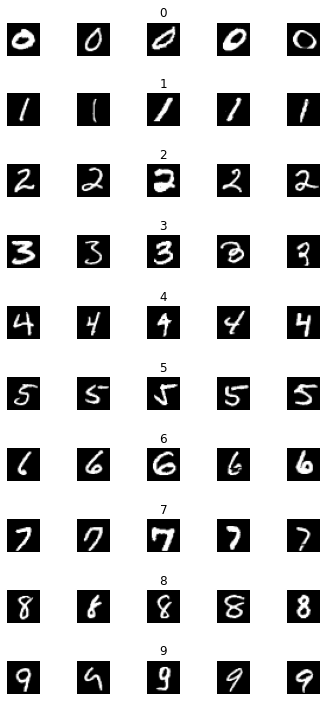

In [31]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))







[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


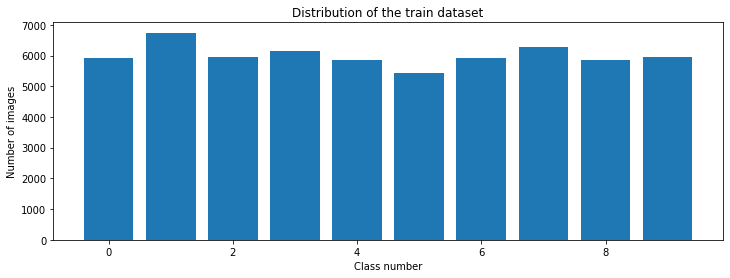

In [32]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [33]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [34]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [37]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [38]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 2s 10ms/step - loss: 0.2146 - accuracy: 0.9323 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 2/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9841 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0409 - val_accuracy: 0.9890
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0391 - val_accuracy: 0.9895
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0387 - val_accuracy: 0.9898
Epoch

Text(0.5, 0, 'epoch')

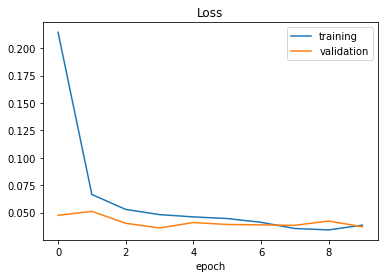

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

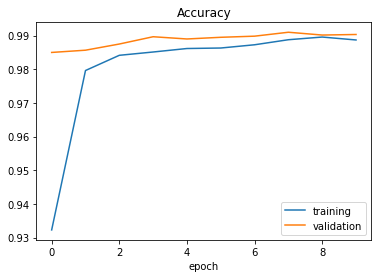

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)

In [41]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03544095903635025
Test accuracy: 0.9890999794006348


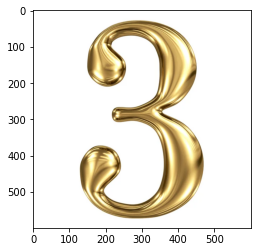

In [42]:
#predict internet number
import requests
from PIL import Image
url = 'https://st2.depositphotos.com/1001311/5495/i/600/depositphotos_54959831-stock-photo-golden-shining-metallic-3d-symbol.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

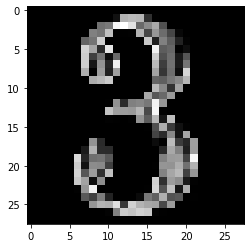

In [43]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [44]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [45]:
print("predicted digit: "+str(np.argmax(model.predict(img), axis=-1)))

1/1 [==============================] - 0s 106ms/step
predicted digit: [3]


In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03544095903635025
Test accuracy: 0.9890999794006348


In [47]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [48]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)


1/1 [==============================] - 0s 59ms/step


In [49]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


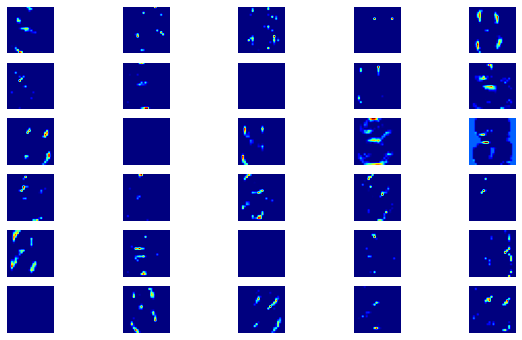

In [50]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

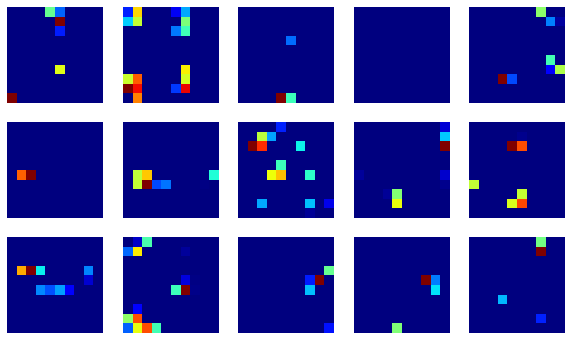

In [51]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')